In [23]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import yfinance as yf 




In [24]:
yf.pdr_override()

df = pdr.get_data_yahoo('GOOG', start="2010-01-01", end="2023-06-01")

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [25]:
df.describe()
df = df.reset_index()

In [26]:
df.columns

df = df[['Open', 'High', 'Low', 'Close',
       'Volume']]
df

,Open,High,Low,Close,Volume
0,15.615220,15.678981,15.547723,15.610239,78541293
1,15.620949,15.637387,15.480475,15.541497,120638494
2,15.588072,15.588072,15.102393,15.149715,159744526
3,15.178109,15.193053,14.760922,14.797037,257533695
4,14.744733,15.024933,14.672753,14.994298,189680313
...,...,...,...,...,...
3370,121.879997,122.750000,120.750000,121.639999,23087900
3371,125.209999,125.980003,122.900002,124.349998,33812700
3372,124.065002,126.000000,123.290001,125.430000,25154700
3373,126.290001,126.379997,122.889999,124.639999,27230700


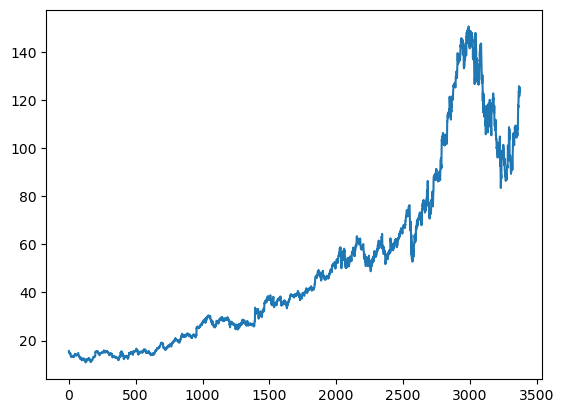

In [27]:
plt.plot(df.Close)

In [28]:
ma100 = df.Close.rolling(100).mean()

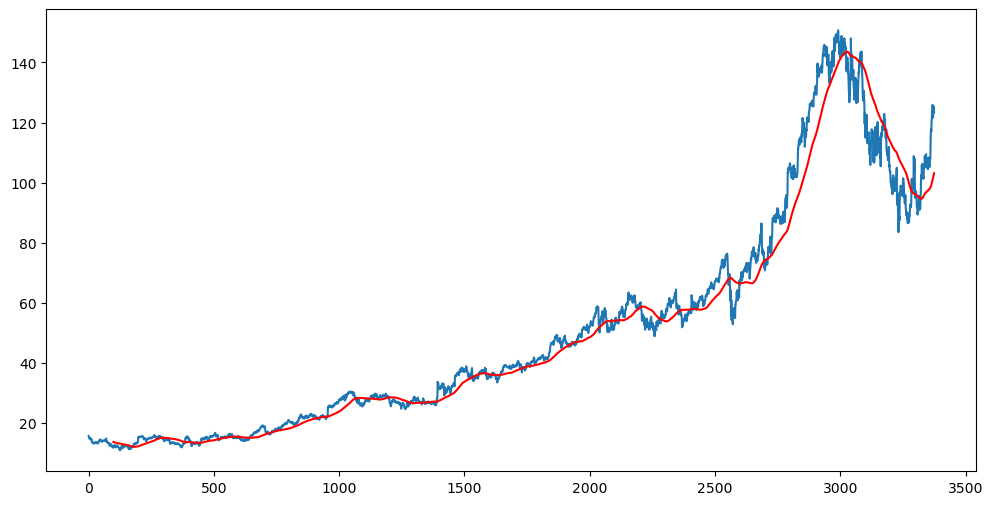

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [30]:
ma200 = df.Close.rolling(200).mean()

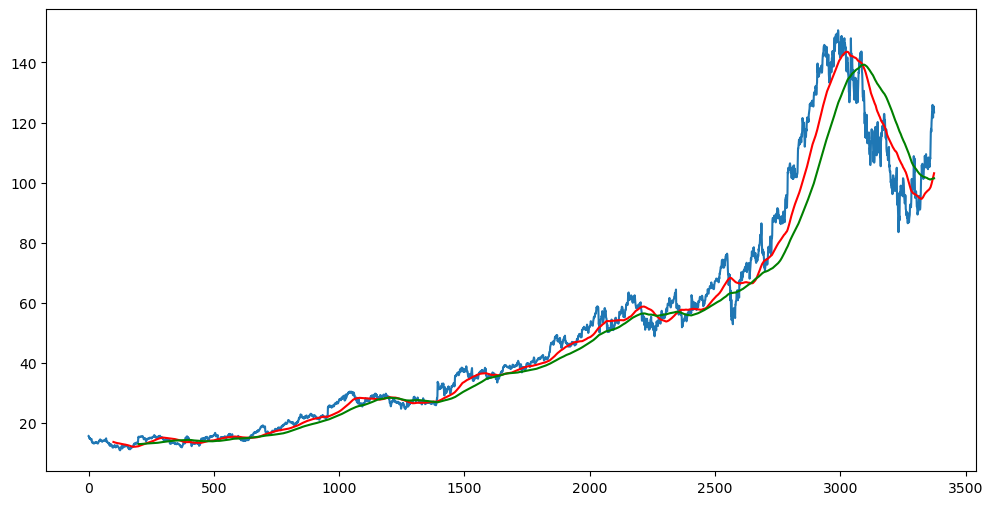

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [32]:
df_training = pd.DataFrame(df["Close"][0:int(len(df)*.7)])
df_testing = pd.DataFrame(df["Close"][int(len(df)*.7):int(len(df))])
df_training

,Close
0,15.610239
1,15.541497
2,15.149715
3,14.797037
4,14.994298
...,...
2357,58.949001
2358,58.115002
2359,56.942501
2360,57.481499


In [33]:
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(df_training)
X

array([[0.08874029],
       [0.08745582],
       [0.08013526],
       ...,
       [0.8610467 ],
       [0.87111804],
       [0.87279039]])

In [34]:
X_train = []
y_train = []
for i in range(100,X.shape[0]):
    X_train.append(X[i-100:i,0])
    y_train.append(X[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [35]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2262, 100, 1)

In [36]:
regressor = Sequential()

regressor.add(LSTM(units=50, activation = 'relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60, activation = 'relu', return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, activation = 'relu', return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))


In [37]:
regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [38]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train,y_train, epochs=50)

Epoch 1/50
71/71 [==============================] - 52s 568ms/step - loss: 0.0397
Epoch 2/50
71/71 [==============================] - 53s 749ms/step - loss: 0.0080
Epoch 3/50
71/71 [==============================] - 28s 398ms/step - loss: 0.0073
Epoch 4/50
71/71 [==============================] - 25s 358ms/step - loss: 0.0063
Epoch 5/50
71/71 [==============================] - 29s 409ms/step - loss: 0.0059
Epoch 6/50
71/71 [==============================] - 27s 379ms/step - loss: 0.0057
Epoch 7/50
71/71 [==============================] - 28s 390ms/step - loss: 0.0050
Epoch 8/50
71/71 [==============================] - 68s 969ms/step - loss: 0.0056
Epoch 9/50
71/71 [==============================] - 67s 937ms/step - loss: 0.0045
Epoch 10/50
71/71 [==============================] - 52s 728ms/step - loss: 0.0043
Epoch 11/50
71/71 [==============================] - 37s 523ms/step - loss: 0.0043
Epoch 12/50
71/71 [==============================] - 46s 638ms/step - loss: 0.0042
Epoch 13/50
7

In [39]:
regressor.save('model1.h5')

C:\Users\Ahmed\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
df_testing


,Close
2362,57.038502
2363,56.673500
2364,56.707500
2365,55.823002
2366,55.897499
...,...
3370,121.639999
3371,124.349998
3372,125.430000
3373,124.639999


In [76]:
y = df_training.tail(100).append(df_testing , ignore_index=True)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_14188\519978349.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = df_training.tail(100).append(df_testing , ignore_index=True)


In [77]:
y

,Close
0,51.854000
1,51.780499
2,52.292500
3,50.803001
4,53.535500
...,...
1108,121.639999
1109,124.349998
1110,125.430000
1111,124.639999


In [78]:
test=scaler.fit_transform(y)

In [79]:
test.shape

(1113, 1)

In [80]:
X_test = []
y_test = []
for i in range(100,test.shape[0]):
    X_test.append(test[i-100:i,0])
    y_test.append(test[i,0])
X_test = np.array(X_test)
y_test = np.array(y_test)

In [81]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

print(X_test)

[[[0.01051988]
  [0.00978417]
  [0.014909  ]
  ...
  [0.06145276]
  [0.06684781]
  [0.06774366]]

 [[0.00978417]
  [0.014909  ]
  [0.        ]
  ...
  [0.06684781]
  [0.06774366]
  [0.06241367]]

 [[0.014909  ]
  [0.        ]
  [0.02735069]
  ...
  [0.06774366]
  [0.06241367]
  [0.05876022]]

 ...

 [[0.38933594]
  [0.37942664]
  [0.36000837]
  ...
  [0.72555203]
  [0.70903649]
  [0.73616198]]

 [[0.37942664]
  [0.36000837]
  [0.37392152]
  ...
  [0.70903649]
  [0.73616198]
  [0.74697216]]

 [[0.36000837]
  [0.37392152]
  [0.38032753]
  ...
  [0.73616198]
  [0.74697216]
  [0.73906471]]]


In [82]:
y_pred = regressor.predict(X_test)

32/32 [==============================] - 9s 127ms/step


In [83]:
y_pred

array([[0.12816218],
       [0.1260019 ],
       [0.12416938],
       ...,
       [0.67516077],
       [0.6871996 ],
       [0.69826484]], dtype=float32)

In [84]:
scaler.scale_

array([0.01000941])

In [85]:
scale_factor = 1/0.01000941

y_pred = y_pred*scale_factor
y_test = y_test*scale_factor
print(y_pred)
print(y_test)

[[12.804169]
 [12.588344]
 [12.405265]
 ...
 [67.45261 ]
 [68.65536 ]
 [69.76084 ]]
[ 6.23549973  5.87049808  5.90449848 ... 74.62699161 73.83699077
 72.56699425]


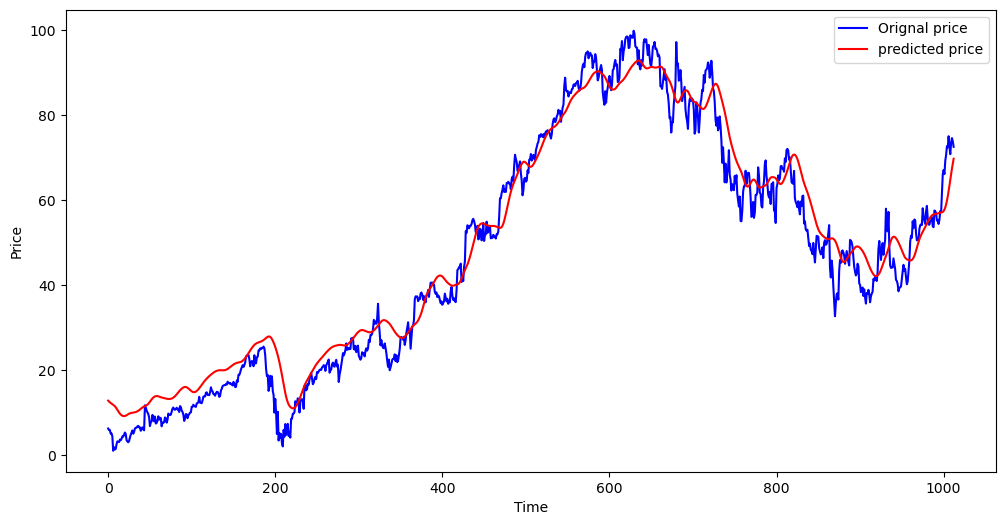

In [86]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Orignal price')
plt.plot(y_pred,'r',label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5.5571531849509


In [93]:
from sklearn.metrics import mean_absolute_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.483639647874932
